In [4]:
import pandas as pd

df = pd.read_csv('reviews_1324169.csv')
df = clean_review_column(df, 'Review')
documents = df['Review']

## keybert 감성분석?

In [4]:
from keybert import KeyBERT
from transformers import pipeline

# KeyBERT 모델 불러오기
kw_model = KeyBERT()

# 감정 분석 모델 불러오기 (한국어 감정 분석 모델 Hugging Face 사용)
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 한글 리뷰 텍스트
doc = """
이 제품은 정말 훌륭합니다. 가격 대비 성능이 좋고, 디자인도 매우 세련되었습니다. 다만, 배터리 수명이 좀 짧은 것이 아쉽습니다.
"""

# 키워드 추출
keywords = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words=None, top_n=5)

# 결과 출력 (키워드와 부정 점수 출력)
for keyword, score in keywords:
    sentiment = sentiment_analyzer(keyword)[0]
    sentiment_score = sentiment['score']
    sentiment_label = sentiment['label']
    
    # 감정 분석 결과가 부정적이면 출력
    if "negative" in sentiment_label.lower():
        print(f"키워드: {keyword}, 중요도 점수: {score}, 부정 점수: {sentiment_score}, 감정: {sentiment_label}")


In [5]:
from keybert import KeyBERT
from transformers import pipeline

# KeyBERT 모델 불러오기
kw_model = KeyBERT()

# 감정 분석 모델 불러오기 (한국어 감정 분석 모델 Hugging Face 사용)
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 한글 리뷰 텍스트
doc = """
이 제품은 정말 훌륭합니다. 가격 대비 성능이 좋고, 디자인도 매우 세련되었습니다. 다만, 배터리 수명이 좀 짧은 것이 아쉽습니다.
"""

# 키워드 추출
keywords = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words=None, top_n=5)

# 결과 출력 (키워드와 감정 점수 모두 출력)
for keyword, score in keywords:
    sentiment = sentiment_analyzer(keyword)[0]
    sentiment_score = sentiment['score']
    sentiment_label = sentiment['label']
    
    print(f"키워드: {keyword}, 중요도 점수: {score:.4f}, 감정 점수: {sentiment_score:.4f}, 감정: {sentiment_label}")
    
    # 감정이 부정적인 경우를 확인
    if "negative" in sentiment_label.lower():
        print(f"부정적인 키워드 발견: {keyword}")


키워드: 정말 훌륭합니다, 중요도 점수: 0.7644, 감정 점수: 0.6460, 감정: 5 stars
키워드: 대비 성능이, 중요도 점수: 0.7442, 감정 점수: 0.3548, 감정: 4 stars
키워드: 디자인도 매우, 중요도 점수: 0.7338, 감정 점수: 0.3271, 감정: 4 stars
키워드: 훌륭합니다 가격, 중요도 점수: 0.7072, 감정 점수: 0.4895, 감정: 5 stars
키워드: 성능이 좋고, 중요도 점수: 0.7012, 감정 점수: 0.4389, 감정: 4 stars


# KeyBERT

In [17]:
from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# KeyBERT 모델 초기화
kw_model = KeyBERT()

# 한글 불용어 리스트 (필요에 따라 추가 가능)
# stop_words = ['좋다', '하다', '입다', '같다', '이다', '있다', '너무', '편하다', 
#              '예쁘다', '이쁘다', '구매', '자다', '보다', '사다', '않다', '으로']

# 리뷰 데이터를 담고 있는 DataFrame을 불러오기 (이미 로드되어 있다고 가정)
# df = pd.read_csv('reviews_1324169.csv')  # 이미 데이터가 있으니 필요 없을 수 있음
# documents = df['Review']

# 한국어의 경우, 단어를 추출할 때 `CountVectorizer`로 사용자 정의 불용어를 처리
vectorizer = CountVectorizer(ngram_range=(1, 1)) #, stop_words=stop_words)

# 각 문서에서 핵심 키워드 추출
def extract_keywords(text):
    # 각 텍스트에서 상위 5개의 키워드 추출
    keywords = kw_model.extract_keywords(text, vectorizer=vectorizer, top_n=5)
    return keywords

# 전체 문서에 대해 핵심 키워드 추출
df['Keywords'] = documents.apply(extract_keywords)

# 키워드가 잘 추출되었는지 확인
print(df[['Review', 'Keywords']].head())


                                              Review  \
0   임산부라 울퉁불퉁 한데 M사이즈 편하게 잘 맞고 부드럽고 좋아요 주머니도 있어서 조아요   
1             허리가 살짝 큰데 끈으로 조이면 되고 주머니가 있어서 편하고 좋아요    
2  요즘 살쪄서 편하게 입을 치마 찾다가 샀는데 편하고 조아여 옆트임때매 핏이 이상해보...   
3  배송은 토요일에 시켰는데 화요일에 와서 빠르게 온 것 같구요 받자마자 입어봤는데 너...   
4    살짝 큰감잇는데 여유잇어서 오히려좋아요 옆트임잇어서 활동성도좋고 포인트도되고 예쁘네용   

                                            Keywords  
0  [(울퉁불퉁, 0.659), (m사이즈, 0.5768), (임산부라, 0.4585)...  
1  [(조이면, 0.7387), (편하고, 0.6701), (허리가, 0.6583), ...  
2  [(이상해보일, 0.7136), (종아리알, 0.6051), (보여서, 0.5439...  
3  [(디자인의, 0.3507), (생각해서, 0.3429), (무난무난하니, 0.32...  
4  [(활동성도좋고, 0.5075), (포인트도되고, 0.5075), (큰감잇는데, 0...  


In [18]:
df

,Review,Star,Keywords
0,임산부라 울퉁불퉁 한데 M사이즈 편하게 잘 맞고 부드럽고 좋아요 주머니도 있어서 조아요,5.0,"[(울퉁불퉁, 0.659), (m사이즈, 0.5768), (임산부라, 0.4585)..."
1,허리가 살짝 큰데 끈으로 조이면 되고 주머니가 있어서 편하고 좋아요,5.0,"[(조이면, 0.7387), (편하고, 0.6701), (허리가, 0.6583), ..."
2,요즘 살쪄서 편하게 입을 치마 찾다가 샀는데 편하고 조아여 옆트임때매 핏이 이상해보...,5.0,"[(이상해보일, 0.7136), (종아리알, 0.6051), (보여서, 0.5439..."
3,배송은 토요일에 시켰는데 화요일에 와서 빠르게 온 것 같구요 받자마자 입어봤는데 너...,5.0,"[(디자인의, 0.3507), (생각해서, 0.3429), (무난무난하니, 0.32..."
4,살짝 큰감잇는데 여유잇어서 오히려좋아요 옆트임잇어서 활동성도좋고 포인트도되고 예쁘네용,5.0,"[(활동성도좋고, 0.5075), (포인트도되고, 0.5075), (큰감잇는데, 0..."
...,...,...,...
1003,사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것 같아요,5.0,"[(사이즈도, 0.6545), (입을, 0.6045), (재질도, 0.6014), ..."
1004,너무 마음에 듭니다 사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것같아요,5.0,"[(사이즈도, 0.6568), (입을, 0.6033), (여름에도, 0.583), ..."
1005,색상도 좋구요 원단과 핏도 원하던바라 마음에 드네요,5.0,"[(원하던바라, 0.7683), (원단과, 0.7114), (색상도, 0.6047)..."
1006,편하고 좋아요 길이감도 적당하고 옆으로 트여서 활동성이 좋아요,5.0,"[(적당하고, 0.5935), (활동성이, 0.5858), (편하고, 0.5182)..."


In [26]:
from collections import Counter

# 각 문서에서 추출된 키워드를 모은 리스트 생성
all_keywords = []

for keywords in df['Keywords']:
    # keywords는 [(단어, 가중치), (단어, 가중치), ...] 형식이므로 단어만 추출
    all_keywords.extend([keyword[0] for keyword in keywords])

# 키워드의 빈도 계산
keyword_counts = Counter(all_keywords)

# 빈도 상위 10개의 키워드 출력
top_keywords = keyword_counts.most_common(15)

# 상위 10개의 키워드와 그 빈도를 출력
print("상위 15개의 키워드:")
for word, count in top_keywords:
    print(f"{word}: {count}번")

상위 15개의 키워드:
편하게: 126번
편하고: 103번
너무: 71번
입기: 69번
좋아요: 68번
편해요: 55번
입을: 50번
사이즈: 48번
입고: 47번
생각보다: 44번
길이도: 34번
재질도: 32번
입으면: 31번
적당하고: 30번
사이즈가: 30번


In [25]:
from collections import Counter
from konlpy.tag import Okt

# Okt 형태소 분석기 초기화
okt = Okt()

stop_words = ['좋다', '입다', '같다', '이다', '있다', '입']

# 키워드를 원형으로 변환
def lemmatize_keyword(keyword):
    morphs = okt.pos(keyword, stem=True)  # 형태소 분석 및 어간 추출
    lemmatized = [word for word, pos in morphs if pos in ['Noun', 'Verb', 'Adjective']] # 명사, 동사, 형용사 추출
    return ' '.join(lemmatized) if lemmatized else None  # 원형 변환된 단어들을 합침, 없으면 None 반환

# 키워드를 모두 모아서 리스트로 풀기
all_keywords = []
for keywords in df['Keywords']:
    # 키워드 원형으로 변환 후 리스트에 추가 (불용어 제외)
    for keyword, score in keywords:
        lemmatized_keyword = lemmatize_keyword(keyword)
        if lemmatized_keyword and lemmatized_keyword not in stop_words:  # 불용어 필터링
            all_keywords.append(lemmatized_keyword)

# 각 키워드의 빈도를 계산
keyword_counts = Counter(all_keywords)

# 상위 10개의 키워드 추출
top_10_keywords = keyword_counts.most_common(10)

# 결과 출력
print(top_10_keywords)

[('편하다', 355), ('사이즈', 151), ('재질', 90), ('적당하다', 88), ('길이', 58), ('생각', 54), ('배송', 48), ('탄탄하다', 47), ('허리', 44), ('만족하다', 39)]


In [21]:
from collections import defaultdict

# 키워드와 유사도를 저장할 딕셔너리 초기화
keyword_scores = defaultdict(float)

# 키워드를 모두 모아서 유사도를 합산
for keywords in df['Keywords']:
    for keyword, score in keywords:
        keyword_scores[keyword] += score  # 키워드에 유사도(score) 더하기

# 유사도가 높은 상위 10개 키워드 추출
top_10_keywords_with_scores = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# 결과 출력
print(top_10_keywords_with_scores)


[('편하게', 62.94150000000006), ('편하고', 61.68129999999999), ('너무', 35.94299999999999), ('입기', 31.4097), ('편해요', 30.203599999999998), ('사이즈', 27.7089), ('생각보다', 25.678900000000013), ('좋아요', 25.203299999999995), ('입을', 24.365100000000005), ('입고', 24.27990000000001)]


In [28]:
from collections import defaultdict
from konlpy.tag import Okt

# Okt 형태소 분석기 초기화
okt = Okt()

stop_words = ['좋다', '입다', '같다', '이다', '있다', '입', '생각']


# 키워드를 원형으로 변환하는 함수
def lemmatize_keyword(keyword):
    morphs = okt.pos(keyword, stem=True)  # 형태소 분석 + 어간 추출
    # 품사가 명사(Noun)이거나 동사(Verb), 형용사(Adjective)인 경우만 원형으로 변환
    lemmatized = [word for word, pos in morphs if pos in ['Noun', 'Verb', 'Adjective']]
    return ' '.join(lemmatized)  # 원형 변환된 단어들을 문자열로 합침

# 키워드와 유사도를 저장할 딕셔너리 초기화
keyword_scores = defaultdict(float)

# 키워드를 모두 모아서 유사도를 합산 (원형으로 변환하여 처리)
for keywords in df['Keywords']:
    for keyword, score in keywords:
        lemmatized_keyword = lemmatize_keyword(keyword)  # 키워드 원형 변환
        if lemmatized_keyword and lemmatized_keyword not in stop_words:  # 원형이 비어있지 않고 불용어가 아니라면
            keyword_scores[lemmatized_keyword] += score  # 원형 키워드에 유사도 합산

# 유사도가 높은 상위 10개 키워드 추출
top_10_keywords_with_scores = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# 결과 출력
print(top_10_keywords_with_scores)


[('편하다', 195.7306999999996), ('사이즈', 87.30550000000002), ('적당하다', 52.67120000000002), ('재질', 50.345700000000015), ('길이', 29.842700000000004), ('탄탄하다', 27.411699999999996), ('배송', 27.08099999999998), ('만족하다', 25.235500000000002), ('허리', 23.582800000000006), ('넉넉하다', 21.136899999999997)]


In [45]:
import pandas as pd

df = pd.read_csv('reviews_2551401-1.csv')
df

,Review,Star,Keyword
0,168 기준 살짝 짧은 기장이기는 하지만 속바지가 있어서 편하게 입기 좋아요 옆쪽 ...,5.0,"기장, 속바지, 슬릿, 포인트, 휘뚜루마뚜루"
1,디자인은 정말 예쁜데 안에 박음질은 엉망이에요단 기장이 아예 다르게 어긋나있는데도 ...,3.0,"디자인, 박음질, 기장, 교환, 허접"
2,교복 치마 대신 입으려고 샀는데 편하고 핏도 예쁘고 너무 만족합니다,4.0,"교복, 치마, 편, 핏, 예쁘고"
3,저렴한 가격인데 품질 좋네요안에 속바지가 있어서 좀 짧긴해도 부담없어요저한테는 허리...,4.0,"저렴한, 가격, 품질, 안에, 속바지, 허리, 엉덩이, 스타일, 굿굿"
4,사이즈랑 길이가 완전 딱입니다 160대초반 44사이즈 입으시면 xs사이즈 예쁘게 잘...,5.0,"사이즈, 길이, 160대초반, 44사이즈, xs사이즈, 속바지, 편하게, 입을, 짧..."
...,...,...,...
1001,무탠다드는 첨 구입했는데 왜 인기가 많은지알겟어요 너무맘에들어오,5.0,"무탠다드, 인기가많은, 맘에들어오"
1002,짧은편이긴 한데 속바지가 있어 편하게 입습니다 구김은 좀 잘가요,5.0,"속바지, 편하게, 구김"
1003,바지 길이라고 생각하면 적당하고 바지는 통이 널널해서 속바지 입어야할거같아요,5.0,"바지, 길이, 통, 널널, 속바지"
1004,솔직히 짧긴 짧아용 근데 이 기장이 젤 예쁜 기장이라 포기할 수 없네요 열심히 살...,5.0,"짧아용, 기장, 포기할, 살 빼서, 휘뚜루마뚜루, 치마로, 재질도"


# 한국어 전처리 패키지 시도

### 띄어쓰기 설치하기

In [35]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to c:\users\hwan\appdata\local\temp\pip-req-build-_zj7ryi_
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2287177 sha256=84293777e5fc3f795ae85d2c7f966f4c721695b007bcaf3498bfc18c4c4942cb
  Stored in directory: C:\Users\HWAN\AppData\Local\Temp\pip-ephem-wheel-cache-7e1s1213\wheels\76\1f\66\ecf5b2f136847d084f6e9af3c732f2899ee9f9b229a45aa8b8
Successfully built pykospacing


  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git 'C:\Users\HWAN\AppData\Local\Temp\pip-req-build-_zj7ryi_'


### test

In [37]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [38]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


### 맞춤법검사기 설치하기

In [41]:
pip install py-hanspell

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip uninstall py-hanspell

^C
Note: you may need to restart the kernel to use updated packages.


# LDA

In [9]:
from konlpy.tag import Okt
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pandas as pd

In [10]:
df = pd.read_csv('reviews_1324169.csv')
df

,Review,Star
0,임산부라;; 울퉁불퉁 한데 M사이즈 편하게 잘 맞고 부드럽고 좋아요 주머니도 있어서...,5.0
1,허리가 살짝 큰데 끈으로 조이면 되고\n주머니가 있어서 편하고 좋아요~,5.0
2,요즘 살쪄서 편하게 입을 치마 찾다가 샀는데 편하고 조아여 옆트임때매 핏이 이상해보...,5.0
3,배송은 토요일에 시켰는데 화요일에 와서 빠르게 온 것 같구요 받자마자 입어봤는데 너...,5.0
4,살짝 큰감잇는데 여유잇어서 오히려좋아요 옆트임잇어서 활동성도좋고 포인트도되고 예쁘네용,5.0
...,...,...
1003,사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것 같아요,5.0
1004,너무 마음에 듭니다 사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것같아요,5.0
1005,색상도 좋구요\n원단과 핏도 원하던바라\n마음에 드네요,5.0
1006,편하고 좋아요 길이감도 적당하고 옆으로 트여서 활동성이 좋아요,5.0


In [3]:
# 전처리 코드 정의
def clean_review_column(df, column_name):
    # '\n'을 제거하고 한글 자모 및 구두점 제거
    df[column_name] = df[column_name].str.replace('\n', ' ', regex=False)  # 개행 문자 제거
    df[column_name] = df[column_name].str.replace(r'[ㄱ-ㅎㅏ-ㅣ]+', ' ', regex=True)  # 한글 자모 제거
    df[column_name] = df[column_name].str.replace(r'[^\w\s]', ' ', regex=True)  # 특정 구두점 제거
    
    # 여러 공백을 한 칸으로 변환
    df[column_name] = df[column_name].str.replace(r'\s+', ' ', regex=True)  # 여러 개의 공백을 한 칸으로 변환

    return df

In [12]:
df = clean_review_column(df, 'Review')
df

,Review,Star
0,임산부라 울퉁불퉁 한데 M사이즈 편하게 잘 맞고 부드럽고 좋아요 주머니도 있어서 조아요,5.0
1,허리가 살짝 큰데 끈으로 조이면 되고 주머니가 있어서 편하고 좋아요,5.0
2,요즘 살쪄서 편하게 입을 치마 찾다가 샀는데 편하고 조아여 옆트임때매 핏이 이상해보...,5.0
3,배송은 토요일에 시켰는데 화요일에 와서 빠르게 온 것 같구요 받자마자 입어봤는데 너...,5.0
4,살짝 큰감잇는데 여유잇어서 오히려좋아요 옆트임잇어서 활동성도좋고 포인트도되고 예쁘네용,5.0
...,...,...
1003,사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것 같아요,5.0
1004,너무 마음에 듭니다 사이즈도 딱이고 재질도 너무 좋아요 여름에도 입을 수 있을것같아요,5.0
1005,색상도 좋구요 원단과 핏도 원하던바라 마음에 드네요,5.0
1006,편하고 좋아요 길이감도 적당하고 옆으로 트여서 활동성이 좋아요,5.0


In [16]:
df['Review'].isnull().sum()

0

In [17]:
documents = df['Review']

In [18]:
# 한글 형태소 분석기 Okt 사용
okt = Okt()

# 1. 형태소 분석 및 불용어 처리
def preprocess(text):
    tokens = okt.nouns(text)  # 명사만 추출
    stop_words = ['이', '그', '저', '그리고', '하지만']  # 불용어 추가
    return [word for word in tokens if word not in stop_words]

# 문서에 대해 전처리 수행
processed_docs = [preprocess(doc) for doc in documents]

# 2. 단어 사전 및 말뭉치(corpus) 생성
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# 3. LDA 모델 학습
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42, passes=10)

# 4. 각 토픽 출력
topics = lda_model.print_topics(num_words=4)
for idx, topic in topics:
    print(f"토픽 {idx}: {topic}")

토픽 0: 0.032*"재질" + 0.029*"사이즈" + 0.022*"것" + 0.017*"입"
토픽 1: 0.030*"구매" + 0.028*"사이즈" + 0.024*"허리" + 0.021*"길이"
토픽 2: 0.023*"사이즈" + 0.021*"좀" + 0.021*"더" + 0.021*"허리"


In [31]:
text = '임산부라 울퉁불퉁 한데 M사이즈 편하게 잘 맞고 부드럽고 좋아요 주머니도 있어서 조아요'

# 형태소
okt.morphs(text)
okt.morphs(text, stem=True)

['임산부',
 '라',
 '울퉁불퉁',
 '한데',
 'M',
 '사이즈',
 '편하다',
 '자다',
 '맞다',
 '부드럽다',
 '좋다',
 '주머니',
 '도',
 '있다',
 '좋다']

In [39]:
print(okt.pos(text))
print('-'*30)
print(okt.pos(text, norm=True))
print('-'*30)
print(okt.pos(text, stem=True))
print('-'*30)
print(okt.pos(text, norm=True, stem=True))

[('임산부', 'Noun'), ('라', 'Josa'), ('울퉁불퉁', 'Adverb'), ('한데', 'Eomi'), ('M', 'Alpha'), ('사이즈', 'Noun'), ('편하게', 'Adjective'), ('잘', 'Verb'), ('맞고', 'Verb'), ('부드럽고', 'Adjective'), ('좋아요', 'Adjective'), ('주머니', 'Noun'), ('도', 'Josa'), ('있어서', 'Adjective'), ('조아요', 'Adjective')]
------------------------------
[('임산부', 'Noun'), ('라', 'Josa'), ('울퉁불퉁', 'Adverb'), ('한데', 'Eomi'), ('M', 'Alpha'), ('사이즈', 'Noun'), ('편하게', 'Adjective'), ('잘', 'Verb'), ('맞고', 'Verb'), ('부드럽고', 'Adjective'), ('좋아요', 'Adjective'), ('주머니', 'Noun'), ('도', 'Josa'), ('있어서', 'Adjective'), ('조아요', 'Adjective')]
------------------------------
[('임산부', 'Noun'), ('라', 'Josa'), ('울퉁불퉁', 'Adverb'), ('한데', 'Eomi'), ('M', 'Alpha'), ('사이즈', 'Noun'), ('편하다', 'Adjective'), ('자다', 'Verb'), ('맞다', 'Verb'), ('부드럽다', 'Adjective'), ('좋다', 'Adjective'), ('주머니', 'Noun'), ('도', 'Josa'), ('있다', 'Adjective'), ('좋다', 'Adjective')]
------------------------------
[('임산부', 'Noun'), ('라', 'Josa'), ('울퉁불퉁', 'Adverb'), ('한데', 'Eomi'), ('M', 'Alpha

In [29]:
okt.nouns(text)

['임산부', '사이즈', '주머니']

In [28]:
okt.phrases(text)

['임산부', 'M사이즈', '주머니', '사이즈']

In [47]:
# 한글 형태소 분석기 Okt 사용
okt = Okt()

# 1. 형태소 분석 및 불용어 처리
def preprocess(text):
    tokens = okt.morphs(text, stem=True)
    stop_words = ['좋다', '하다', '입다', '같다', '이다', '있다', '너무', '편하다', 
                  '예쁘다', '이쁘다', '구매', '자다', '보다', '사다', '않다', '으로']  # 불용어 추가
    return [word for word in tokens if word not in stop_words and len(word) > 1]

# 문서에 대해 전처리 수행
processed_docs = [preprocess(doc) for doc in documents]

# 2. 단어 사전 및 말뭉치(corpus) 생성
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# 3. LDA 모델 학습
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)
 
# 4. 각 토픽 출력
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"토픽 {idx}: {topic}")

토픽 0: 0.030*"사이즈" + 0.014*"적당하다" + 0.013*"맞다" + 0.012*"넉넉하다" + 0.012*"치마"
토픽 1: 0.026*"재질" + 0.023*"사이즈" + 0.021*"길이" + 0.020*"적당하다" + 0.018*"허리"
토픽 2: 0.029*"트이다" + 0.021*"재질" + 0.019*"되다" + 0.018*"생각" + 0.016*"허리"
토픽 3: 0.021*"허리" + 0.019*"길이" + 0.015*"사이즈" + 0.014*"여름" + 0.013*"자주"
토픽 4: 0.026*"크다" + 0.022*"사이즈" + 0.014*"들다" + 0.014*"맞다" + 0.012*"만족하다"


토픽 0의 워드클라우드


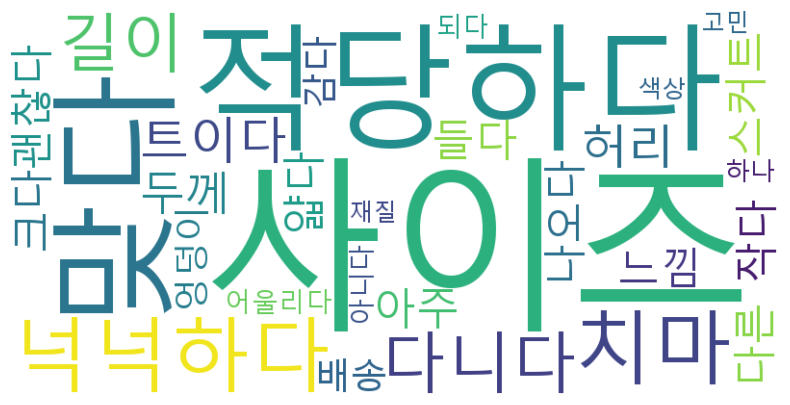

토픽 1의 워드클라우드


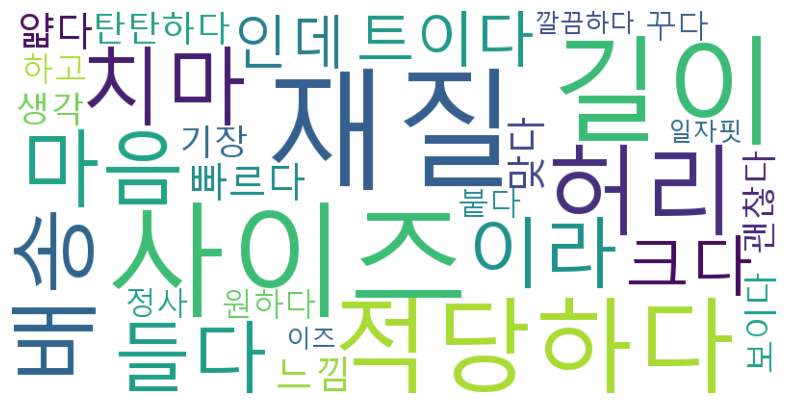

토픽 2의 워드클라우드


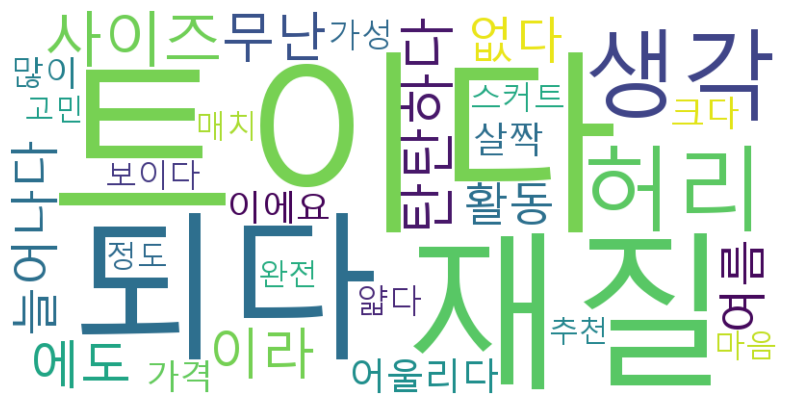

토픽 3의 워드클라우드


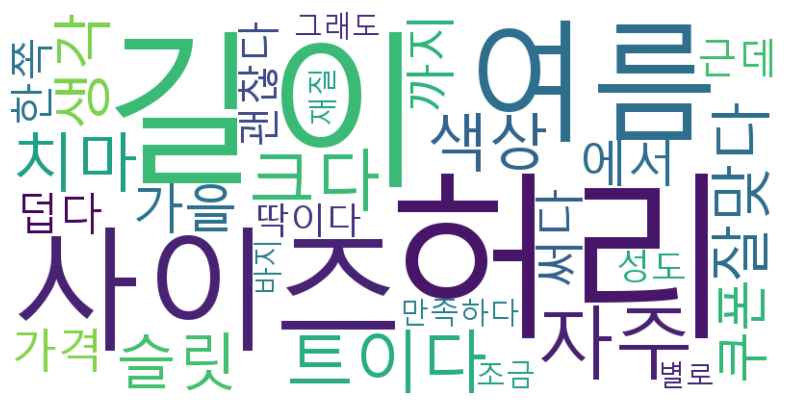

토픽 4의 워드클라우드


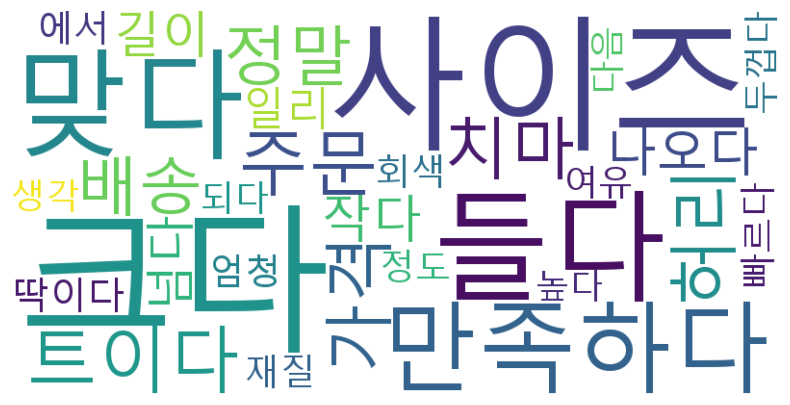

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 경로 지정 (Windows의 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 경로 (예: 맑은 고딕)

# 각 토픽에 대한 워드클라우드 생성 함수
def create_wordcloud(lda_model, topic_id):
    # LDA 모델에서 특정 토픽의 단어와 그 가중치 추출
    topic_words = lda_model.show_topic(topic_id, topn=30)
    
    # 단어와 가중치 딕셔너리 생성
    word_freq = {word: weight for word, weight in topic_words}

    # 워드클라우드 생성
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 예시: 5개의 토픽에 대해 각각 워드클라우드 생성
for i in range(5):
    print(f"토픽 {i}의 워드클라우드")
    create_wordcloud(lda_model, topic_id=i)

# OKT 사전 추가

In [29]:
import konlpy
konlpy.data.path

['C:\\Users\\HWAN/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'C:\\Users\\HWAN\\anaconda3\\konlpy_data',
 'C:\\Users\\HWAN\\anaconda3\\lib\\konlpy_data',
 'C:\\Users\\HWAN\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\HWAN\\anaconda3\\Lib\\site-packages\\konlpy/data']

In [34]:
import os

os.chdir('C:\Users\HWAN\anaconda3\Lib\site-packages\konlpy\java')
os.getcwd()

!jar xvf open-korean-text-2.1.0.jar

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4218281735.py, line 3)